<a href="https://colab.research.google.com/github/SebaVGit/analisis-sentimientos-imdb/blob/main/An%C3%A1lisis_de_Sentimientos_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de sentimientos
Pregunta 2 solemne 3 2020 Curso de `Modelos Computacionales de la Física y Astronomía` de la UNAB.

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Cargar la data
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_targets, test_targets), axis=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
#Explorando los datos
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


In [4]:
# Seguimos explorando los datos para saber como se ven
print(data[0][:10])
print(len(data[0]))
#Y decodificado
index = imdb.get_word_index()
# Si deseas chequear como es el index, descomenta la linea de abajo.
#print(index)
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]])
# The first 20 characters of decoded
print(decoded[:20])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
218
# this film was just


In [5]:
# Para preparar los datos necesitamos que cada review tenga el mismo numero de palabras, para ello,
# hacemos que todos tengan 10000 palabras y aquellos que tienen menos se llenan con ceros.
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [6]:
# Dividir datos para train y test
# En este caso se divide de manera sencilla sin aleatoreidad (queda propuesto)
data2 = vectorize(data)
targets = np.array(targets).astype("float32")
test_x = data2[:10000]
test_y = targets[:10000]
train_x = data2[10000:]
train_y = targets[10000:]

In [7]:
# Dado que hay dos clases por clasificar se usan 2 unicamente
train_y = keras.utils.to_categorical(train_y, 2)
test_y = keras.utils.to_categorical(test_y,2)

In [8]:
# Es importante ver las dimensiones de nuestros arreglos
# Por lo que se printean
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(40000, 10000)
(40000, 2)
(10000, 10000)
(10000, 2)


In [9]:
# Cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = train_x.shape[0]
M_test = test_x.shape[0]

# N seran las neuronas de entrada que recibirá la red, en este caso la cantidad
# o dimensión de cada ejemplo de la data del IMDB
# Por otro lado C sera la cantidad de salida, en este caso 2 pues estamos clasificando entre
# 2 casos posibles
N = train_x.shape[1]
C = train_y.shape[1]

print(N,C,M_train,M_test)

10000 2 40000 10000


In [10]:
# Seteamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


# Creamos nuestra red feed-forward (tiene 2 capas escondidas!)

h1 = 512 #Dimensión de la capa oculta 1
h2 = 256 #Dimensión de la capa oculta 2

#Se recomienda el uso de Relu como función de activación

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
# Agregamos unas capas de dropout para probar como se comporta la red
# Recordemos que el argumento de este proceso representa la probabilidad de 
# que una neurona se apague.
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dropout(0.4))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dropout(0.5))
# La última capa hace softmax pues es un clasificador y esto entrega la probabilidad
# Mayor ante las clases que se clasificaran
red.add(keras.layers.Dense(C, activation='softmax'))

# Esto hace que se muestre la red
red.summary()

# En esta sección se crea o "compila" la red en tensorflow, recordemos que Keras es una API de tensorflow
# Usamos SGD o Stochastic gradient descent pero queda propuesto probar con el que se desee
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 5

In [11]:
# Aquí comienza el entrenamiento, se puede ir probando con el número de épocas y batch size (ojo con este pues depende de tu PC en gran parte)
# Se le coloca validation_data para que puedas obtener de una el gráfico de la certeza del modelo

hist = red.fit(train_x, train_y,
        epochs=20,
        batch_size=128,
        validation_data=(test_x,test_y)
       )

Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 0.6925 - accuracy: 0.5207 - val_loss: 0.6589 - val_accuracy: 0.7240
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 0.6441 - accuracy: 0.6520 - val_loss: 0.5084 - val_accuracy: 0.8002
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 0.5078 - accuracy: 0.7693 - val_loss: 0.3847 - val_accuracy: 0.8384
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 0.4035 - accuracy: 0.8266 - val_loss: 0.3358 - val_accuracy: 0.8594
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 0.3533 - accuracy: 0.8555 - val_loss: 0.3139 - val_accuracy: 0.8673
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.3232 - accuracy: 0.8696 - val_loss: 0.3026 - val_accuracy: 0.8730
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.2973 - accuracy: 0.8824 - val_loss: 0.2906 - val_accuracy: 0.8780
Epoch 

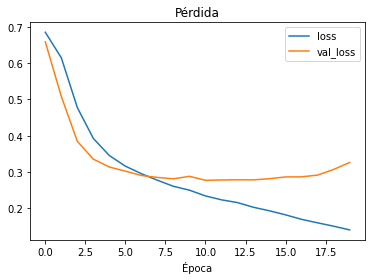

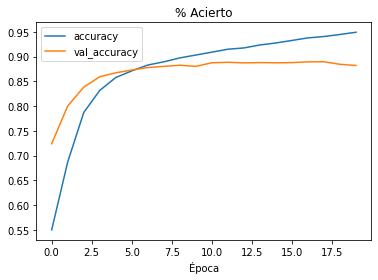

In [12]:
# Mostramos la pérdida y el acierto por cada época
# Como nota la loss es la función de pérdida de la red
# val_= significa validation que es lo que están pidiendo en la tarea
# accuracy o exactitud es una métrica muy usada para saber que tan bien le esta funcionando


plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend()
plt.show()

### Comentarios
* Se puede notar que el accuracy de la validación comienza a alejarse del de entrenamiento alrededor de la época 15.
* Se podría probar con alguna otra configuración de la red y ver que ocurre con más épocas.
* Ahora en caso de que se vea que las curvas de loss y accuracy se distancian mucho, nos encontraremos en un espacio de overfitting por el cual tenemos que repensar la red usada.


In [13]:
# Esta es simplemente una comparativa para testear que este andando correctamente

i=0 # Este indice se cambia para probar con distintas configuraciones (tiene que ser del 0 al 9999)

pred = red.predict(test_x[i].reshape(1,10000))
lpred = np.argmax(pred)
ground_truth = targets[i]
print('Sentimiento predicho: {}, Sentimiento correcto: {}'.format(int(lpred),int(ground_truth)))

Sentimiento predicho: 1, Sentimiento correcto: 1
